<a href="https://colab.research.google.com/github/BasselKhalid/Thesis/blob/main/MyThesisFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset Description
This dataset contains synthetic demographic and behavioral records representing individuals from a marketing or customer analysis perspective. The combined dataset, created by vertically merging Train.csv and Test.csv, consists of 8,292 records and 8 columns, offering a structured foundation for segmentation analysis using clustering techniques such as K-Means.

Each record represents a unique customer and includes attributes related to age, education, profession, family status, and spending behavior. This dataset is designed to facilitate the study of consumer segmentation, behavior profiling, and marketing personalization strategies for small to medium-sized businesses (SMEs).

The dataset includes a mix of numerical and categorical variables, making it ideal for clustering after preprocessing steps such as encoding, normalization, and dimensionality reduction. Features like Age, Spending_Score, and Profession provide rich behavioral signals for segmenting customers into meaningful groups.

Note:The original columns ID, Var_1, and Segmentation were excluded from analysis, as they either represented identifiers or target labels irrelevant to unsupervised clustering.



---
<h3>📑 Column Description</h3>
<table style="width:100%; border-collapse: collapse; font-family: Arial; font-size: 14px;">
  <thead>
    <tr style="background-color: #333; color: #fff;">
      <th style="text-align: left; padding: 8px;">Column</th>
      <th style="text-align: left; padding: 8px;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr><td style="padding: 8px;">Gender</td><td style="padding: 8px;">Categorical variable indicating gender identity (e.g., Male, Female).</td></tr>
    <tr><td style="padding: 8px;">Ever_Married</td><td style="padding: 8px;">Indicates whether the individual has ever been married.</td></tr>
    <tr><td style="padding: 8px;">Age</td><td style="padding: 8px;">Numeric value representing the age of the individual.</td></tr>
    <tr><td style="padding: 8px;">Graduated</td><td style="padding: 8px;">Indicates if the individual has completed graduation.</td></tr>
    <tr><td style="padding: 8px;">Profession</td><td style="padding: 8px;">Professional field or occupation of the individual.</td></tr>
    <tr><td style="padding: 8px;">Work_Experience</td><td style="padding: 8px;">Total years of professional work experience.</td></tr>
    <tr><td style="padding: 8px;">Spending_Score</td><td style="padding: 8px;">Customer's spending behavior categorized as Low, Average, or High.</td></tr>
    <tr><td style="padding: 8px;">Family_Size</td><td style="padding: 8px;">Number of family members associated with the individual.</td></tr>
  </tbody>
</table>



Importing Libraries and Dataset

In [56]:
# === Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

import warnings
warnings.filterwarnings("ignore")

# === Load Dataset ===
from google.colab import files
uploaded = files.upload()

from google.colab import files
uploaded = files.upload()

# === Read Train and Test CSVs ===
df1 = pd.read_csv("Train.csv")
df2 = pd.read_csv("Test.csv")

# === Merge Train and Test Vertically ===
df = pd.concat([df1, df2], axis=0).reset_index(drop=True)

# === Print Summary ===
print("✅ Merged Dataset Shape:", df.shape)

# === Optional Preview ===
display(df.head())



Saving Train.csv to Train (2).csv


Saving Test.csv to Test (2).csv
✅ Merged Dataset Shape: (10695, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


Data Inspection and Cleaning:

 Step 1:  Inspect Dataset Structure

In [57]:
# Overview of the dataset
print("🔎 Dataset Structure:")
df.info()

# Preview the top 5 rows
print("\n📄 Data Preview:")
display(df.head())

# Check for missing values
print("\n🚨 Missing Values:")
missing = df.isnull().sum()
missing = missing[missing > 0]
display(missing)

# Check for duplicates
print("\n📑 Number of duplicate rows:", df.duplicated().sum())


🔎 Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB

📄 Data Preview:


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A



🚨 Missing Values:


,0
Ever_Married,190
Graduated,102
Profession,162
Work_Experience,1098
Family_Size,448
Var_1,108
Segmentation,2627



📑 Number of duplicate rows: 0


Step 2: Data Cleaning

In [58]:
# Drop unnecessary columns (not used for modeling)
drop_cols = ['ID', 'Var_1', 'Segmentation']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Report dataset shape after cleaning
print(f"\n✅ Cleaned Dataset Shape: {df.shape}")



✅ Cleaned Dataset Shape: (8676, 8)


Step 3: Describe and Classify Feature Types

In [59]:
# Identify numerical and categorical columns
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()

print("📌 Numerical Features:", numerical_features)
print("📌 Categorical Features:", categorical_features)


📌 Numerical Features: ['Age', 'Work_Experience', 'Family_Size']
📌 Categorical Features: ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']


Exploratory Data Analysis (EDA)

Q1: What is the gender distribution of customers?

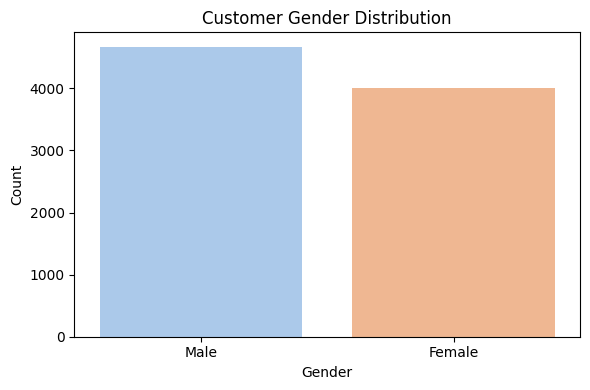

In [60]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Customer Gender Distribution')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Q2: What are the most common professions?

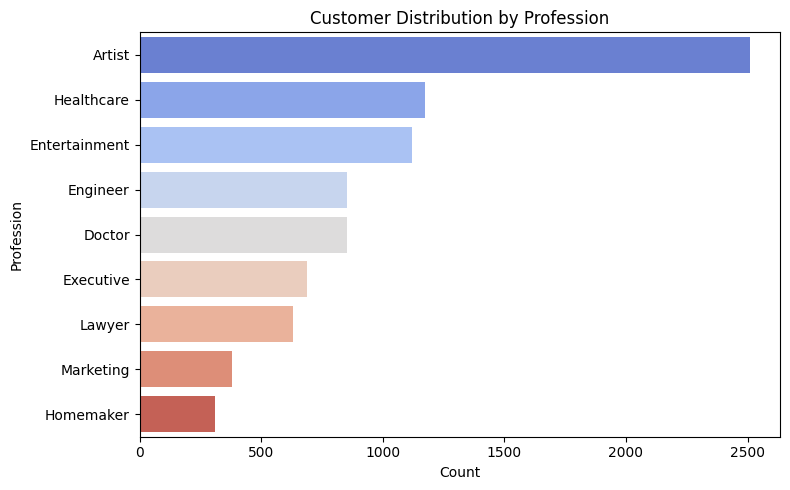

In [61]:
plt.figure(figsize=(8, 5))
order = df['Profession'].value_counts().index
sns.countplot(y='Profession', data=df, order=order, palette='coolwarm')
plt.title('Customer Distribution by Profession')
plt.xlabel('Count')
plt.ylabel('Profession')
plt.tight_layout()
plt.show()

Q3: What is the marital status distribution?

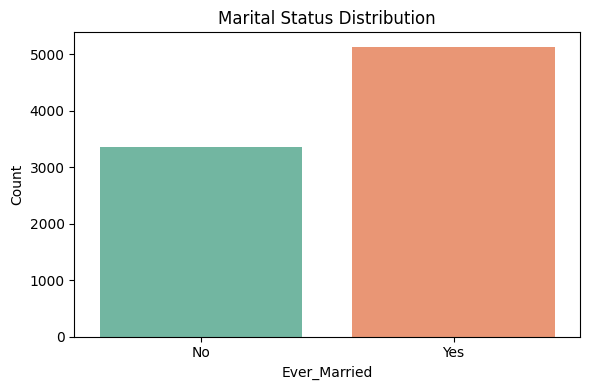

In [62]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Ever_Married', data=df, palette='Set2')
plt.title('Marital Status Distribution')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Q4: What is the distribution of Age?

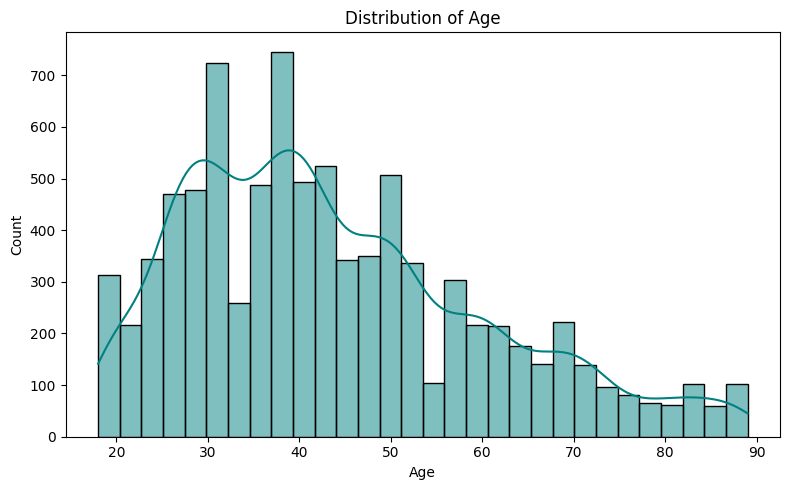

In [63]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=30, color='teal')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.tight_layout()
plt.show()


Q5: What is the relationship between Age and Spending Score?

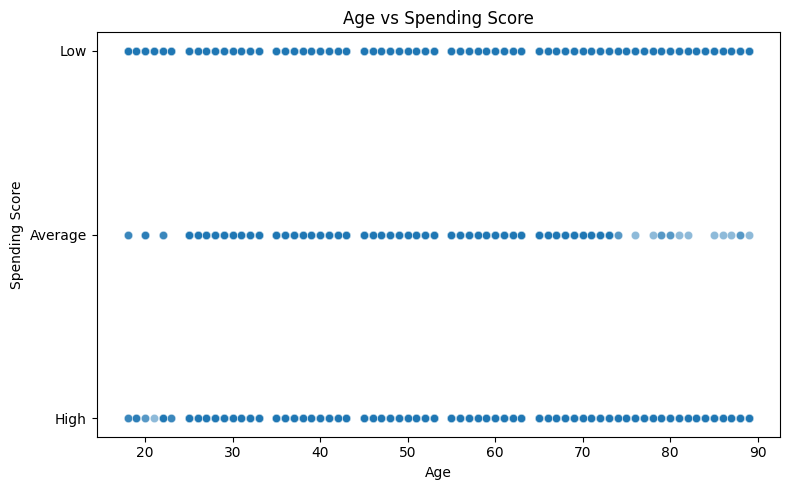

In [64]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Spending_Score', data=df, alpha=0.5)
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.tight_layout()
plt.show()


Q6: What are the most common spending scores?

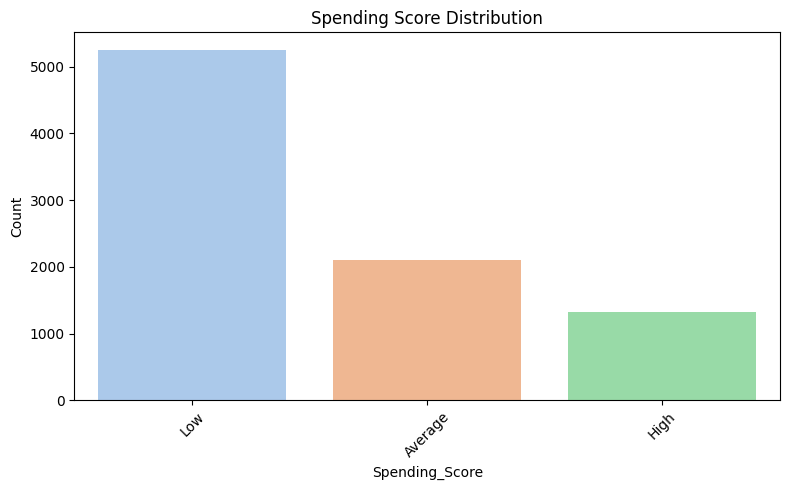

In [65]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Spending_Score', data=df, palette='pastel', order=df['Spending_Score'].value_counts().index)
plt.title('Spending Score Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Q7: Distribution of Work Experience

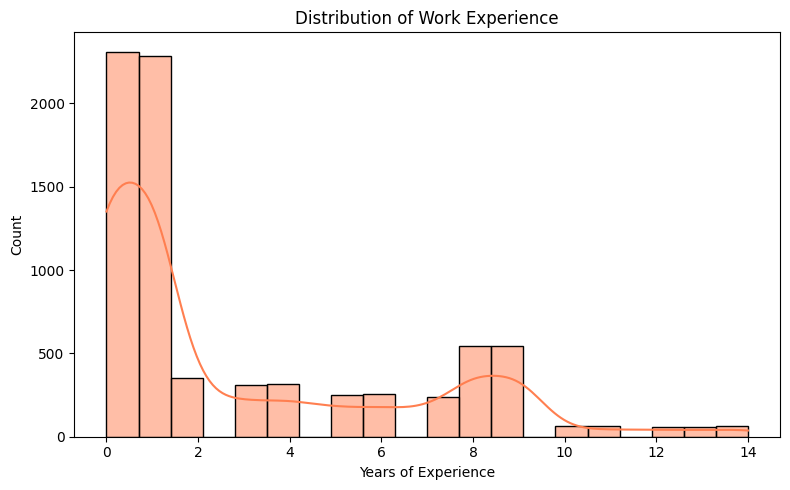

In [66]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Work_Experience'], bins=20, color='coral', kde=True)
plt.title('Distribution of Work Experience')
plt.xlabel('Years of Experience')
plt.tight_layout()
plt.show()

Clustering Pipelines (1,2,3,X)

*Pipeline* 1: Correlation Clean-Up

In [67]:
dfPipeline1=df.copy()

# === Data Cleaning (Handling Missing Values with Mode Imputation for Numerical Columns) ===

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Apply mode imputation ONLY on numerical columns MODE CAN BE APPLIED TO BOTH CATEGORICAL AND NUMERICAL
mode_imputer = SimpleImputer(strategy="most_frequent")
dfPipeline1[numerical_cols] = mode_imputer.fit_transform(dfPipeline1[numerical_cols])
dfPipeline1[categorical_cols] = mode_imputer.fit_transform(dfPipeline1[categorical_cols])
dfPipeline1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8676 entries, 0 to 10694
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8676 non-null   object 
 1   Ever_Married     8676 non-null   object 
 2   Age              8676 non-null   float64
 3   Graduated        8676 non-null   object 
 4   Profession       8676 non-null   object 
 5   Work_Experience  8676 non-null   float64
 6   Spending_Score   8676 non-null   object 
 7   Family_Size      8676 non-null   float64
dtypes: float64(3), object(5)
memory usage: 610.0+ KB


In [68]:
#Need to encode to to find correlation analysis
from sklearn.preprocessing import LabelEncoder

df_encoded = dfPipeline1.copy()
label_encoder = LabelEncoder()

# Example: encode specific categorical columns
for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
df_encoded

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,0,22.0,0,5,1.0,2,4.0
1,0,1,38.0,1,2,0.0,0,3.0
2,0,1,67.0,1,2,1.0,2,1.0
3,1,1,67.0,1,7,0.0,1,2.0
4,0,1,40.0,1,3,0.0,1,6.0
...,...,...,...,...,...,...,...,...
10685,0,0,27.0,0,8,8.0,2,4.0
10686,0,1,42.0,1,0,0.0,2,2.0
10689,0,0,35.0,1,3,1.0,2,2.0
10692,0,0,53.0,1,3,0.0,2,2.0


In [69]:
# Apply correlation analysis only on numerical columns (because correlation needs numbers)
corr_matrix = df_encoded.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop highly correlated features
dfPipeline1 = dfPipeline1.drop(columns=to_drop)

corr_matrix

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
Gender,1.000000,0.126295,0.056546,0.028302,0.021130,0.055007,0.062322,0.050699
Ever_Married,0.126295,1.000000,0.517542,0.131405,0.094350,0.112999,0.598358,0.045721
Age,0.056546,0.517542,1.000000,0.189209,0.063027,0.201441,0.246148,0.239659
Graduated,0.028302,0.131405,0.189209,1.000000,0.233366,0.042119,0.095991,0.195508
Profession,0.021130,0.094350,0.063027,0.233366,1.000000,0.024568,0.189361,0.051614
Work_Experience,0.055007,0.112999,0.201441,0.042119,0.024568,1.000000,0.054883,0.056908
Spending_Score,0.062322,0.598358,0.246148,0.095991,0.189361,0.054883,1.000000,0.135825
Family_Size,0.050699,0.045721,0.239659,0.195508,0.051614,0.056908,0.135825,1.000000


In [70]:
dfPipeline1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8676 entries, 0 to 10694
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8676 non-null   object 
 1   Ever_Married     8676 non-null   object 
 2   Age              8676 non-null   float64
 3   Graduated        8676 non-null   object 
 4   Profession       8676 non-null   object 
 5   Work_Experience  8676 non-null   float64
 6   Spending_Score   8676 non-null   object 
 7   Family_Size      8676 non-null   float64
dtypes: float64(3), object(5)
memory usage: 610.0+ KB


In [71]:
pca = PCA(n_components=0.95)
encoded_PCA = pca.fit_transform(df_encoded)
df_encoded_PCA = pd.DataFrame(encoded_PCA)
dataP1 = df_encoded_PCA

In [72]:
dataP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8676 entries, 0 to 8675
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8676 non-null   float64
 1   1       8676 non-null   float64
dtypes: float64(2)
memory usage: 135.7 KB


Pipeline 2: Dimensional Harmony

In [73]:
dfPipeline2 = df.copy()
dfPipeline2

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0
...,...,...,...,...,...,...,...,...
10685,Female,No,27,No,Marketing,8.0,Low,4.0
10686,Female,Yes,42,Yes,Artist,0.0,Low,2.0
10689,Female,No,35,Yes,Entertainment,1.0,Low,2.0
10692,Female,No,53,Yes,Entertainment,NaN,Low,2.0


In [74]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
# Impute missing values in numerical features
imputer = SimpleImputer(strategy="mean")
dfPipeline2[numerical_cols] = imputer.fit_transform(dfPipeline2[numerical_cols])
dfPipeline2[categorical_cols] = mode_imputer.fit_transform(dfPipeline2[categorical_cols])
dfPipeline2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8676 entries, 0 to 10694
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8676 non-null   object 
 1   Ever_Married     8676 non-null   object 
 2   Age              8676 non-null   float64
 3   Graduated        8676 non-null   object 
 4   Profession       8676 non-null   object 
 5   Work_Experience  8676 non-null   float64
 6   Spending_Score   8676 non-null   object 
 7   Family_Size      8676 non-null   float64
dtypes: float64(3), object(5)
memory usage: 610.0+ KB


In [75]:
def sbs_kmeans(X, max_features=5):
    n_features = X.shape[1]
    features = list(range(n_features))
    best_features = features.copy()
    best_score = -1

    while len(features) > max_features:
        scores = []
        subsets = [list(set(features) - {f}) for f in features]
        for subset in subsets:
            kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
            labels = kmeans.fit_predict(X[:, subset])
            score = silhouette_score(X[:, subset], labels)
            scores.append(score)

        best_subset_idx = np.argmax(scores)
        features = subsets[best_subset_idx]
        best_score = scores[best_subset_idx]

    return X[:, features], features
# Apply SBS to select best numerical features
X_selected, selected_indices = sbs_kmeans(dfPipeline2[numerical_cols].values, max_features=5)  # You can change 5 if you want

In [76]:
selectedattributes = pd.DataFrame(X_selected)
selectedattributes

,0,1,2
0,22.0,1.000000,4.0
1,38.0,2.927016,3.0
2,67.0,1.000000,1.0
3,67.0,0.000000,2.0
4,40.0,2.927016,6.0
...,...,...,...
8671,27.0,8.000000,4.0
8672,42.0,0.000000,2.0
8673,35.0,1.000000,2.0
8674,53.0,2.927016,2.0


In [77]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(X_selected)
dfresult = pd.DataFrame(df_scaled)
dataP2 = dfresult

 Pipeline 3: Clean and Condense

In [78]:
# === Pipeline 3: Clean and Condense ===
dfPipeline3 = df.copy()
dfPipeline3

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0
...,...,...,...,...,...,...,...,...
10685,Female,No,27,No,Marketing,8.0,Low,4.0
10686,Female,Yes,42,Yes,Artist,0.0,Low,2.0
10689,Female,No,35,Yes,Entertainment,1.0,Low,2.0
10692,Female,No,53,Yes,Entertainment,NaN,Low,2.0


In [79]:
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Apply Median imputation ONLY on numerical columns
median_imputer = SimpleImputer(strategy="median")
dfPipeline3[numerical_cols] = median_imputer.fit_transform(dfPipeline3[numerical_cols])

# Apply Mode imputation on categorical columns (optional for consistency)
mode_imputer = SimpleImputer(strategy="most_frequent")
dfPipeline3[categorical_cols] = mode_imputer.fit_transform(dfPipeline3[categorical_cols])

# Check the result
dfPipeline3.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8676 entries, 0 to 10694
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8676 non-null   object 
 1   Ever_Married     8676 non-null   object 
 2   Age              8676 non-null   float64
 3   Graduated        8676 non-null   object 
 4   Profession       8676 non-null   object 
 5   Work_Experience  8676 non-null   float64
 6   Spending_Score   8676 non-null   object 
 7   Family_Size      8676 non-null   float64
dtypes: float64(3), object(5)
memory usage: 610.0+ KB


In [80]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
import numpy as np

# Focus only on numerical features for ENN
X_numeric_p3 = dfPipeline3[numerical_cols].values

# Define ENN function
def edited_nearest_neighbor(X, k=3):
    nn = NearestNeighbors(n_neighbors=k + 1).fit(X)
    neighbors = nn.kneighbors(X, return_distance=False)
    keep_indices = []

    for idx, nbrs in enumerate(neighbors):
        nbrs = nbrs[1:]  # exclude itself
        dists = pairwise_distances(X[idx].reshape(1, -1), X[nbrs])
        if np.mean(dists) < 1.5:
            keep_indices.append(idx)

    return X[keep_indices], keep_indices

# Apply ENN
data_reduced_enn, kept_indices_p3 = edited_nearest_neighbor(X_numeric_p3)

# Filter dfPipeline3 for clustering profiling later
df_filtered_p3 = dfPipeline3.iloc[kept_indices_p3].reset_index(drop=True)

In [81]:
df_filtered_p3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8521 entries, 0 to 8520
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8521 non-null   object 
 1   Ever_Married     8521 non-null   object 
 2   Age              8521 non-null   float64
 3   Graduated        8521 non-null   object 
 4   Profession       8521 non-null   object 
 5   Work_Experience  8521 non-null   float64
 6   Spending_Score   8521 non-null   object 
 7   Family_Size      8521 non-null   float64
dtypes: float64(3), object(5)
memory usage: 532.7+ KB


In [82]:
from sklearn.preprocessing import FunctionTransformer

# Define Decimal Scale Normalization function
def decimal_scale_norm(X):
    j = np.ceil(np.log10(np.abs(X).max(axis=0) + 1e-8))  # Avoid divide by zero
    return X / (10 ** j)

# Apply normalization
scaler = FunctionTransformer(decimal_scale_norm)
dataP3 = scaler.fit_transform(data_reduced_enn)

# Final preprocessed data ready for K-Means
print("✅ Final Preprocessed Shape for K-Means:", dataP3.shape)


✅ Final Preprocessed Shape for K-Means: (8521, 3)


Feature Engineering and Encoding:

One Hot Encoding:

In [83]:
# === Encode Categorical Features (Updated for New Dataset) ===

# Identify categorical features (excluding Var_1 and Segmentation if still present)
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()

# Remove 'Var_1' and 'Segmentation' if still present in the list
categorical_features = [col for col in categorical_features if col not in ['Var_1', 'Segmentation']]

# Identify numerical features (excluding ID and label column 'Segmentation')
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cats = pd.DataFrame(
    encoder.fit_transform(df[categorical_features]),
    columns=encoder.get_feature_names_out(categorical_features),
    index=df.index
)

# Merge numerical and encoded categorical features
df_encoded = pd.concat([df[numerical_features], encoded_cats], axis=1)

# ✅ Check final encoded shape
print("✅ Encoded Dataset Shape:", df_encoded.shape)
df_encoded.head()


✅ Encoded Dataset Shape: (8676, 24)


,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Ever_Married_nan,Graduated_No,Graduated_Yes,...,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_nan,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,22,1.0,4.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,38,NaN,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,67,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,67,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,40,NaN,6.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Pipeline x: No Processing

In [84]:
# === Pipeline X: No Processing (Minimal fix: fill NaNs only) ===
dataPX = df_encoded.fillna(df_encoded.mean(numeric_only=True)).values

Apply K-Means (k=5) to All Pipelines

In [85]:
# Apply KMeans to all 5 pipelines
kmeans_1 = KMeans(n_clusters=5, n_init=10, random_state=42).fit(dataP1)
kmeans_2 = KMeans(n_clusters=5, n_init=10, random_state=42).fit(dataP2)
kmeans_3 = KMeans(n_clusters=5, n_init=10, random_state=42).fit(dataP3)
kmeans_x = KMeans(n_clusters=5, n_init=10, random_state=42).fit(dataPX)


# Store labels
labels_1 = kmeans_1.labels_
labels_2 = kmeans_2.labels_
labels_3 = kmeans_3.labels_
labels_x = kmeans_x.labels_


Elbow Method

To verify if k=5 is appropriate, plot the Elbow Curve for each pipeline:

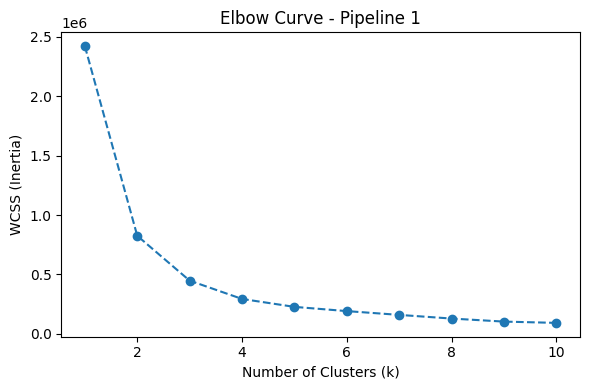

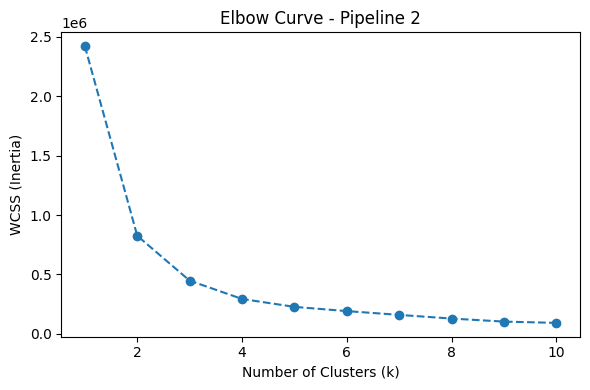

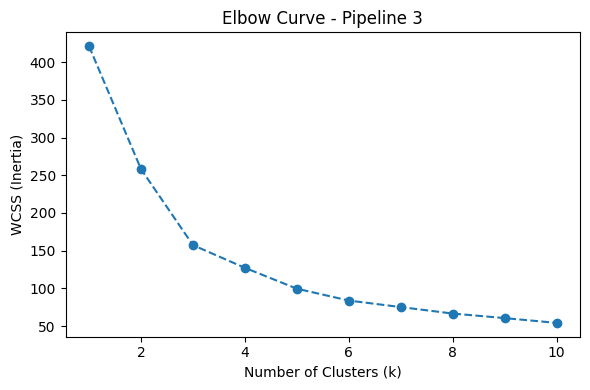

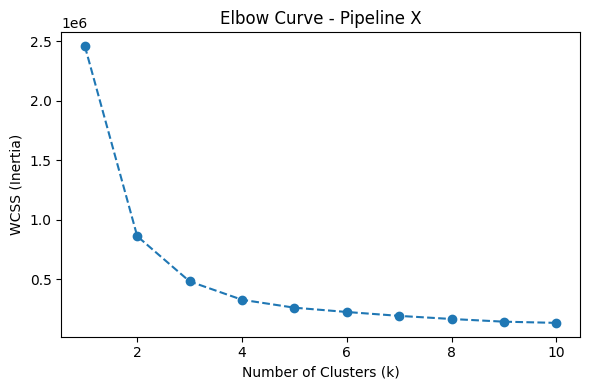

In [86]:
def plot_elbow(data, title):
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(6, 4))
    plt.plot(range(1, 11), wcss, 'o--')
    plt.title(f'Elbow Curve - {title}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS (Inertia)')
    plt.tight_layout()
    plt.show()

plot_elbow(dataP1, "Pipeline 1")
plot_elbow(dataP1, "Pipeline 2")
plot_elbow(dataP3, "Pipeline 3")
plot_elbow(dataPX, "Pipeline X")




Cluster Evaluation Metrics


We will evaluate the quality of clusters using:



Silhouette Score (higher is better)



Inertia (WCSS) (lower is better)



Davies–Bouldin Index (lower is better)



Calinski–Harabasz Score (higher is better)

In [88]:
results = []

for name, data, labels in zip(
    ["1", "2", "3", "X"],
    [dataP1, dataP2, dataP3,dataPX],
    [labels_1, labels_2, labels_3, labels_x]
):
    silhouette = silhouette_score(data, labels)
    dbi = davies_bouldin_score(data, labels)
    ch = calinski_harabasz_score(data, labels)

    results.append({
        "Pipeline": f"Pipeline {name}",
        "Silhouette Score": silhouette,
        "Davies–Bouldin Index": dbi,
        "Calinski–Harabasz Score": ch
    })

eval_df = pd.DataFrame(results).round(4)
display(eval_df)


,Pipeline,Silhouette Score,Davies–Bouldin Index,Calinski–Harabasz Score
0,Pipeline 1,0.4437,0.7102,20997.8588
1,Pipeline 2,0.3338,1.0013,4797.3837
2,Pipeline 3,0.3698,0.8654,6872.4210
3,Pipeline X,0.3936,0.7912,18283.0975


Visual Comparison of Pipelines:

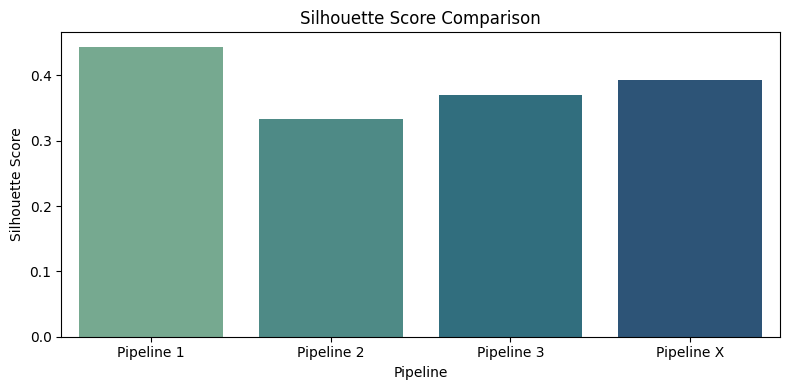

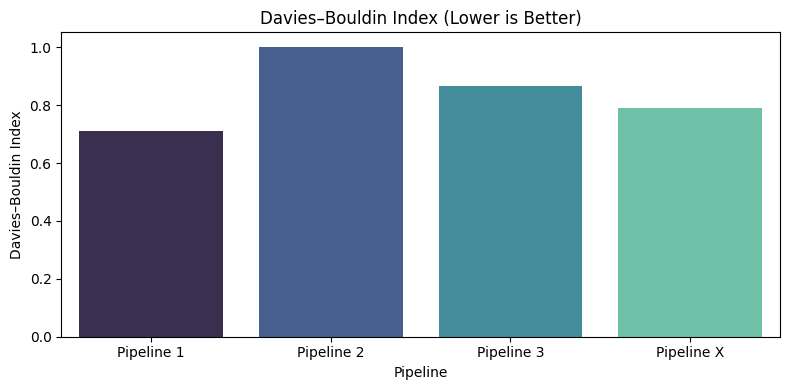

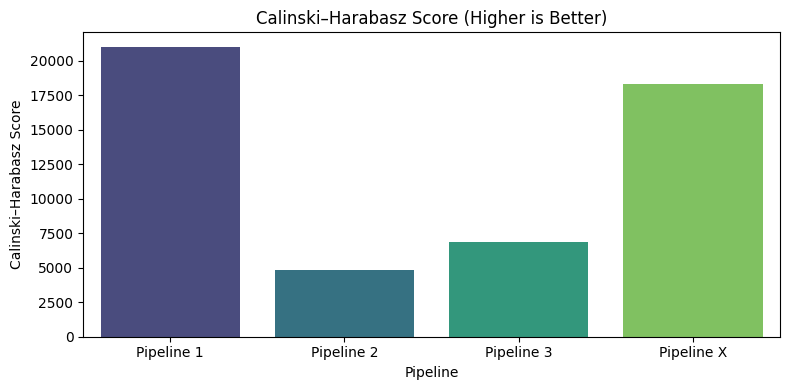

In [89]:
plt.figure(figsize=(8, 4))
sns.barplot(data=eval_df, x="Pipeline", y="Silhouette Score", palette="crest")
plt.title("Silhouette Score Comparison")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 4))
sns.barplot(data=eval_df, x="Pipeline", y="Davies–Bouldin Index", palette="mako")
plt.title("Davies–Bouldin Index (Lower is Better)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(data=eval_df, x="Pipeline", y="Calinski–Harabasz Score", palette="viridis")
plt.title("Calinski–Harabasz Score (Higher is Better)")
plt.tight_layout()
plt.show()


Cluster Profiling & Interpretation:

We'll profile each cluster using descriptive statistics and categorical mode values, then auto-label them based on dominant characteristics and visualize segment distribution.

In [90]:
def profile_clusters_auto_naming(df_original, labels, pipeline_name="Pipeline"):
    df_clusters = df_original.copy()
    df_clusters["Cluster"] = labels

    # Identify columns based on your dataset
    numerical_cols = ["Age", "Work_Experience", "Family_Size"]
    categorical_cols = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score"]

    # Step 1: Compute numeric means per cluster
    num_profile = df_clusters.groupby("Cluster")[numerical_cols].mean().round(1)

    # Step 2: Compute categorical modes per cluster
    cat_profile = df_clusters.groupby("Cluster")[categorical_cols].agg(lambda x: x.value_counts().index[0])

    # Combine profiles
    cluster_profile = pd.concat([num_profile, cat_profile], axis=1)

    # Step 3: Generate descriptive names (auto-labeling)
    cluster_names = {}
    for i, row in cluster_profile.iterrows():
        traits = []
        if row["Age"] < 30:
            traits.append("Young")
        elif row["Age"] > 50:
            traits.append("Senior")
        else:
            traits.append("Mid-age")

        traits.append(row["Spending_Score"])  # e.g., 'Low', 'Average', 'High'
        traits.append("Graduated" if row["Graduated"] == "Yes" else "Not Graduated")

        cluster_names[i] = " | ".join(traits)

    # Step 4: Apply segment names
    df_clusters["Segment"] = df_clusters["Cluster"].map(cluster_names)

    # Step 5: Pie chart of segment sizes
    plt.figure(figsize=(6, 6))
    df_clusters["Segment"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="Set3")
    plt.title(f"Customer Segment Distribution ({pipeline_name})")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

    # Step 6: Boxplots for numerical insights
    for col in numerical_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df_clusters, x="Segment", y=col, palette="pastel")
        plt.title(f"{col} by Segment - {pipeline_name}")
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()

    return df_clusters, cluster_profile, cluster_names


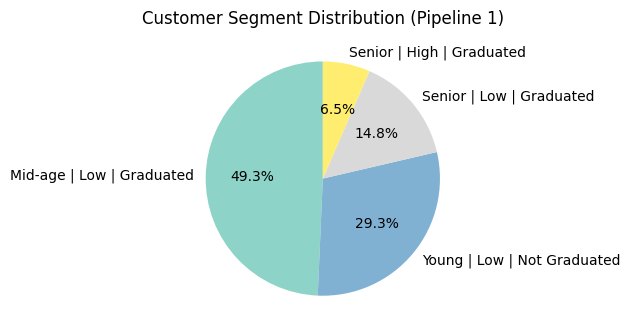

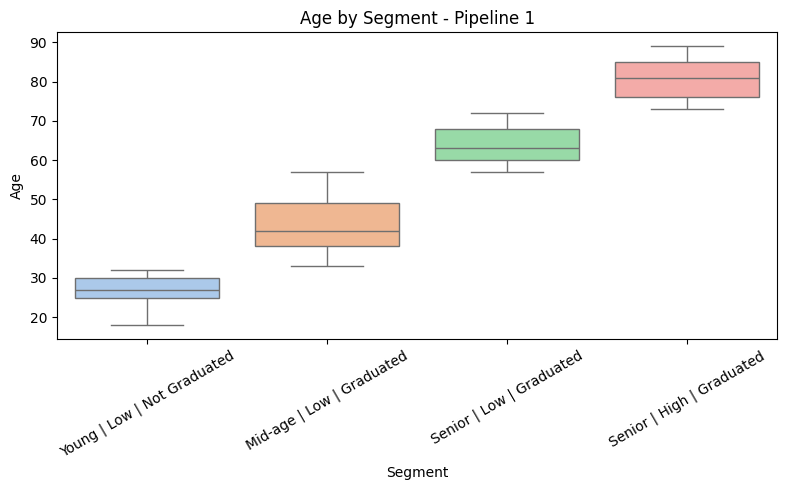

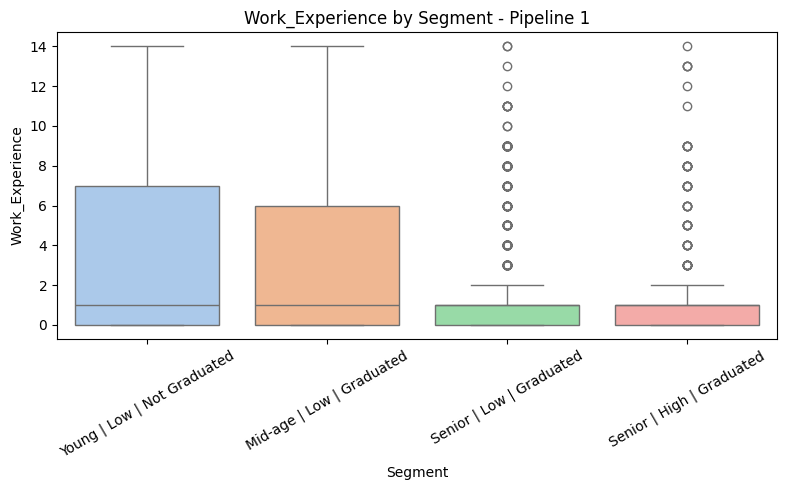

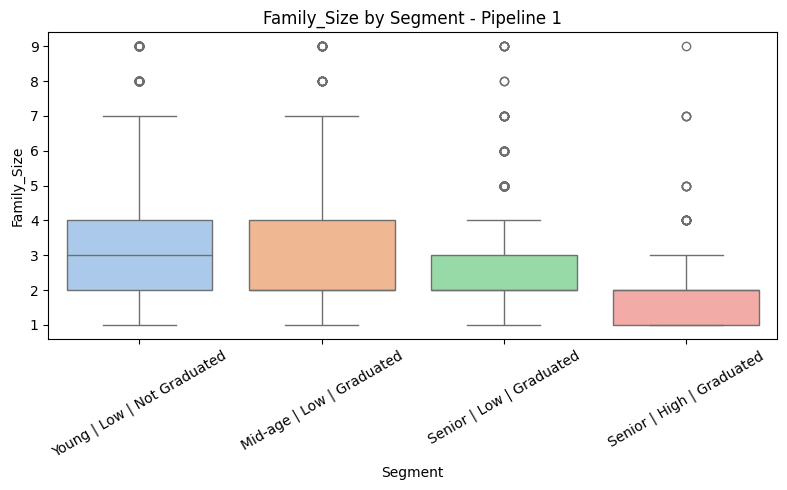

,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score
Cluster,,,,,,,,
0,38.4,3.7,2.7,Male,Yes,Yes,Artist,Low
1,63.9,1.6,2.6,Male,Yes,Yes,Artist,Low
2,26.5,3.5,3.4,Male,No,No,Healthcare,Low
3,49.8,2.4,2.9,Male,Yes,Yes,Artist,Low
4,80.8,1.3,1.9,Male,Yes,Yes,Lawyer,High



🧠 Auto-Labeled Segments:
Cluster 0: Mid-age | Low | Graduated
Cluster 1: Senior | Low | Graduated
Cluster 2: Young | Low | Not Graduated
Cluster 3: Mid-age | Low | Graduated
Cluster 4: Senior | High | Graduated


In [91]:
df_p1_segmented, profile_p1, auto_labels_p1 = profile_clusters_auto_naming(df, labels_1, "Pipeline 1")
display(profile_p1)
print("\n🧠 Auto-Labeled Segments:")
for i, label in auto_labels_p1.items():
    print(f"Cluster {i}: {label}")


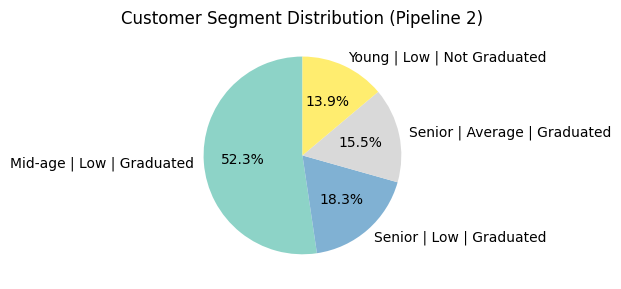

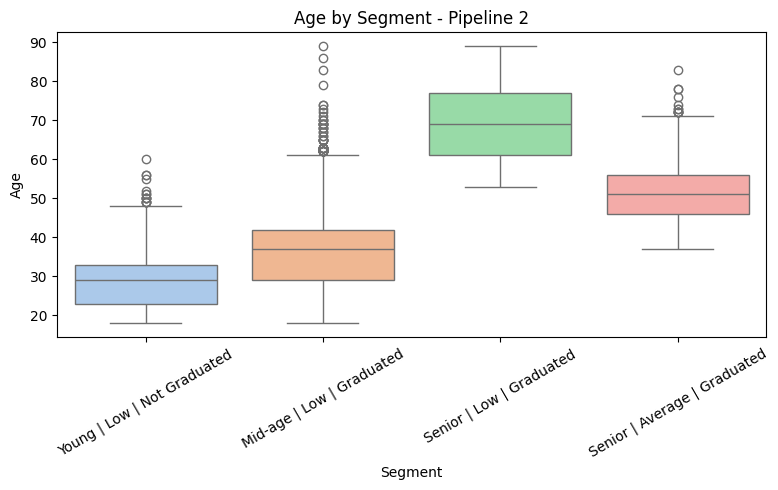

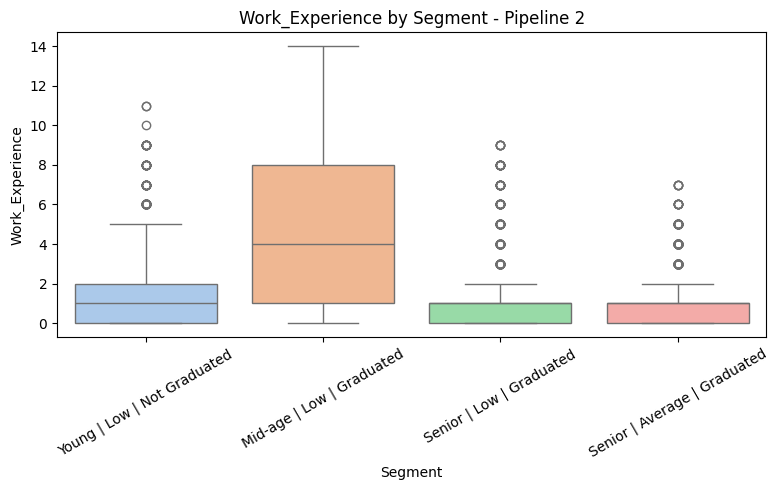

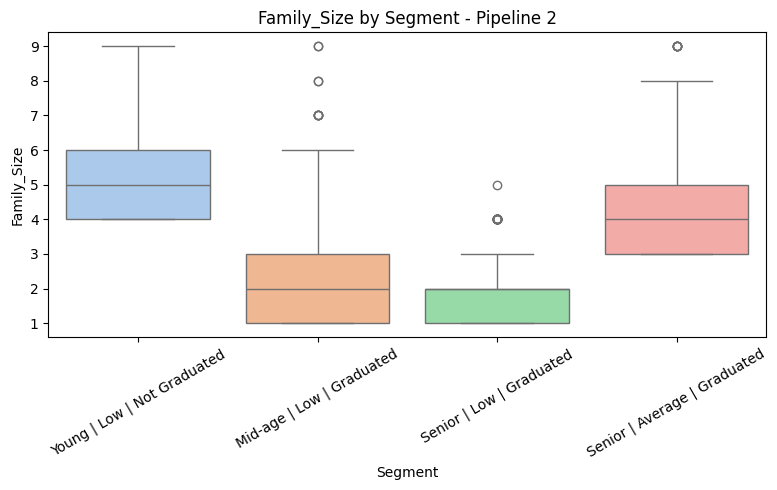

,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score
Cluster,,,,,,,,
0,51.3,1.0,4.1,Male,Yes,Yes,Artist,Average
1,37.3,8.6,2.6,Female,Yes,Yes,Artist,Low
2,28.9,1.6,5.2,Male,No,No,Healthcare,Low
3,69.6,1.0,1.9,Male,Yes,Yes,Lawyer,Low
4,36.0,1.2,2.0,Male,No,Yes,Artist,Low



🧠 Auto-Labeled Segments:
Cluster 0: Senior | Average | Graduated
Cluster 1: Mid-age | Low | Graduated
Cluster 2: Young | Low | Not Graduated
Cluster 3: Senior | Low | Graduated
Cluster 4: Mid-age | Low | Graduated


In [92]:
df_p2_segmented, profile_p2, auto_labels_p2 = profile_clusters_auto_naming(df, labels_2, "Pipeline 2")
display(profile_p2)
print("\n🧠 Auto-Labeled Segments:")
for i, label in auto_labels_p2.items():
    print(f"Cluster {i}: {label}")

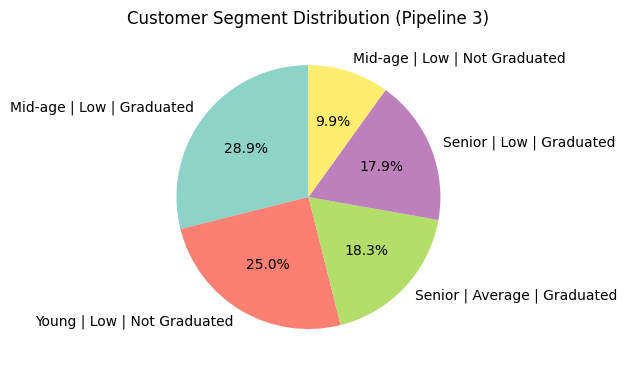

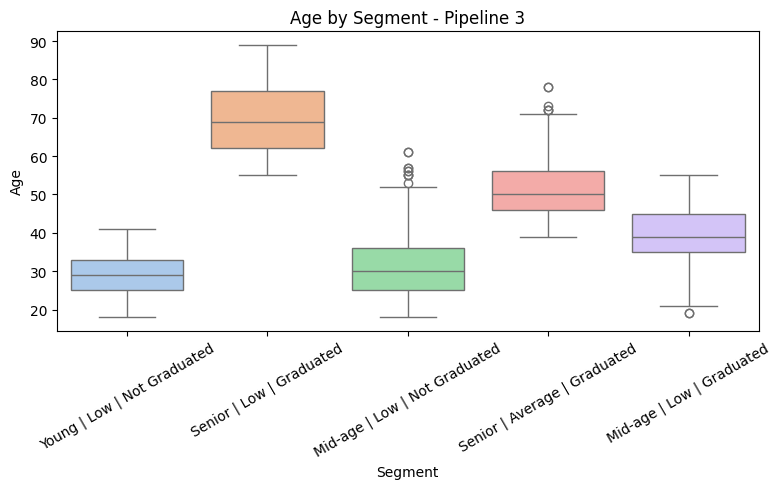

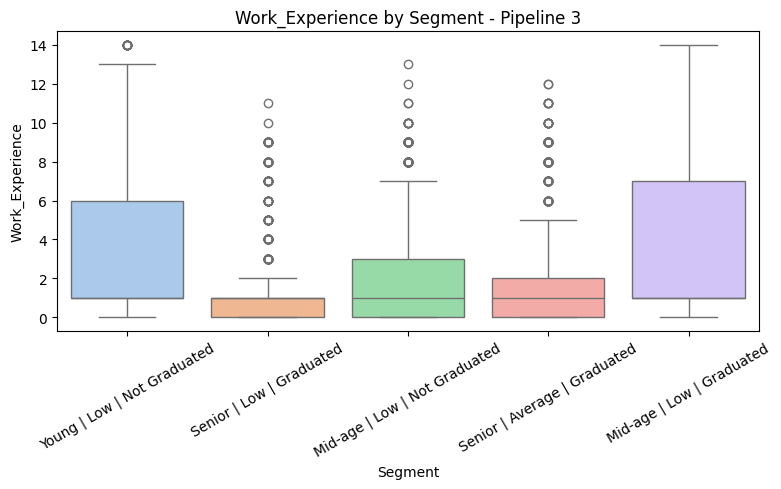

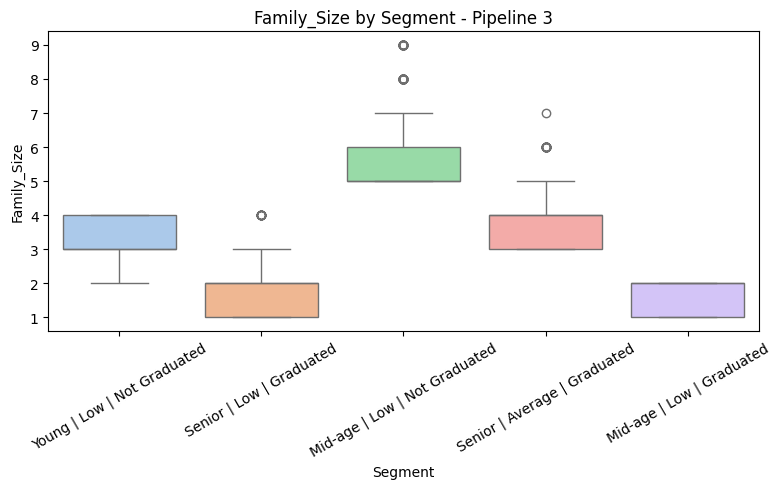

,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score
Cluster,,,,,,,,
0,29.3,3.0,3.2,Male,No,No,Healthcare,Low
1,69.8,1.3,1.9,Male,Yes,Yes,Lawyer,Low
2,39.7,3.7,1.5,Female,Yes,Yes,Artist,Low
3,50.7,1.9,3.8,Male,Yes,Yes,Artist,Average
4,30.7,2.4,5.8,Male,No,No,Healthcare,Low



🧠 Auto-Labeled Segments:
Cluster 0: Young | Low | Not Graduated
Cluster 1: Senior | Low | Graduated
Cluster 2: Mid-age | Low | Graduated
Cluster 3: Senior | Average | Graduated
Cluster 4: Mid-age | Low | Not Graduated


In [93]:
# === Auto-label cluster profiling for Pipeline 3 (filtered dataset) ===
df_p3_segmented, profile_p3, auto_labels_p3 = profile_clusters_auto_naming(df_filtered_p3, labels_3, "Pipeline 3")

# Display profiling results
display(profile_p3)

# Display auto-generated segment names
print("\n🧠 Auto-Labeled Segments:")
for i, label in auto_labels_p3.items():
    print(f"Cluster {i}: {label}")



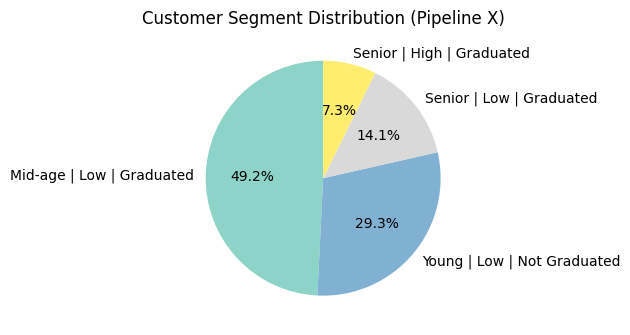

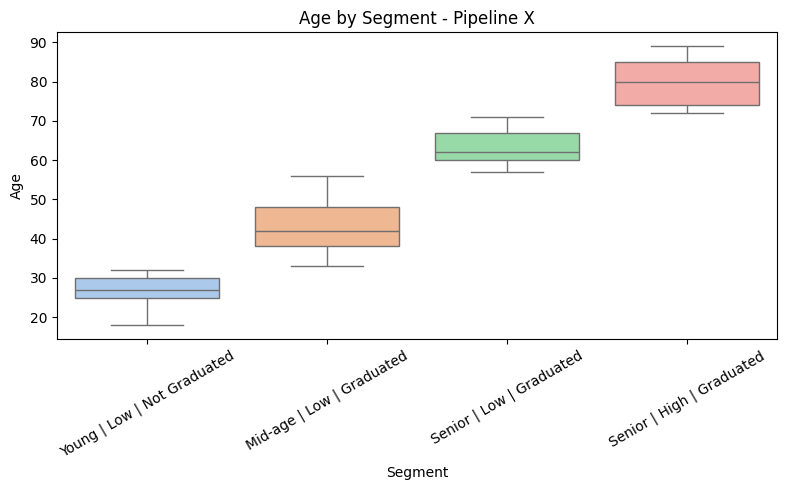

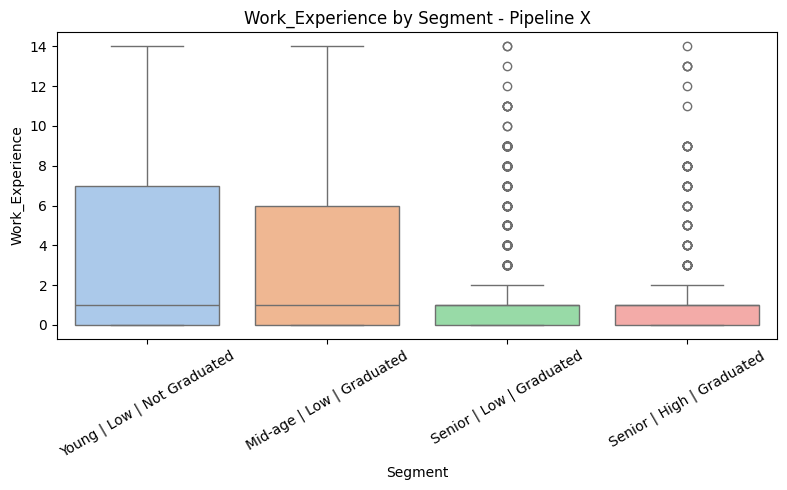

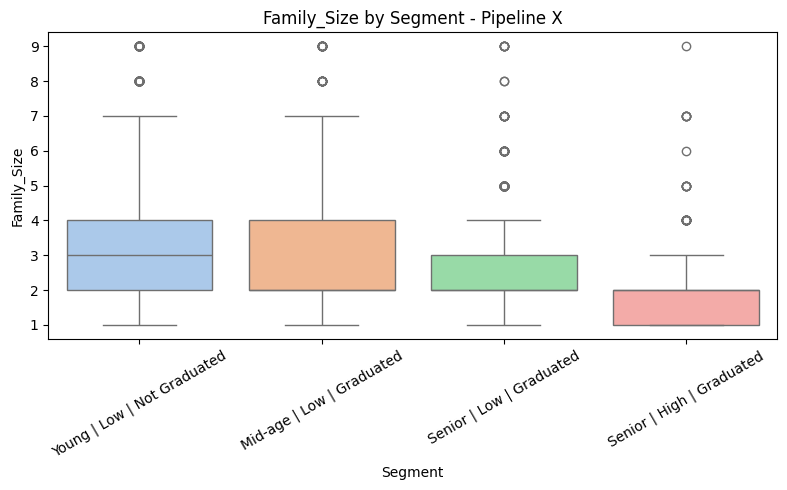

,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score
Cluster,,,,,,,,
0,38.4,3.7,2.7,Male,Yes,Yes,Artist,Low
1,63.3,1.7,2.6,Male,Yes,Yes,Artist,Low
2,79.8,1.3,1.9,Male,Yes,Yes,Lawyer,High
3,26.5,3.5,3.4,Male,No,No,Healthcare,Low
4,49.8,2.4,2.9,Male,Yes,Yes,Artist,Low



🧠 Auto-Labeled Segments:
Cluster 0: Mid-age | Low | Graduated
Cluster 1: Senior | Low | Graduated
Cluster 2: Senior | High | Graduated
Cluster 3: Young | Low | Not Graduated
Cluster 4: Mid-age | Low | Graduated


In [94]:

# === Auto-label cluster profiling for Pipeline X (full dataset, no filtering) ===
df_px_segmented, profile_px, auto_labels_px = profile_clusters_auto_naming(df, labels_x, "Pipeline X")

# Display profiling results
display(profile_px)

# Display auto-generated segment names
print("\n🧠 Auto-Labeled Segments:")
for i, label in auto_labels_px.items():
    print(f"Cluster {i}: {label}")

